#### Scipy lectures:
# 3.3. scikit-image: procesado de imágenes
_Notebook basado en the Scientific Python Lectures:_

_https://lectures.scientific-python.org/packages/scikit-image/index.html_

_Author: Emmanuelle Gouillart_

_Traducción (chatgpt, google translator, deepl) y adaptación a notebook: Pedro Segura_

---

**scikit-image** es un paquete de Python dedicado al procesamiento de imágenes, utilizando arreglos de NumPy como objetos de imagen. Este capítulo describe cómo usar scikit-image para diversas tareas de procesamiento de imágenes, y cómo se relaciona con otros módulos científicos de Python como NumPy y SciPy.

**Ver también:** Para la manipulación básica de imágenes, como el recorte de imágenes o el filtrado simple, se puede realizar una gran cantidad de operaciones simples solo con NumPy y SciPy. Consulte [Manipulación y procesamiento de imágenes usando NumPy y SciPy](https://lectures.scientific-python.org/advanced/image_processing/index.html#basic-image).

Tenga en cuenta que debe estar familiarizado con el contenido del capítulo anterior antes de leer el actual, ya que las operaciones básicas como el enmascarado y el etiquetado son un requisito previo.


## 3.3.1. Introducción y conceptos

Las imágenes son arreglos de NumPy np.ndarray

| |                            |
|------------------|---------------------------------------|
| imagen           | `np.ndarray`                          |
| pixeles          | valores del arreglo: `a[2, 3]`        |
| canales          | dimensiones del arreglo               |
| codificación de imagen | dtype (`np.uint8`, `np.uint16`, `np.float`) |
| filtros          | funciones (numpy, skimage, scipy)     |


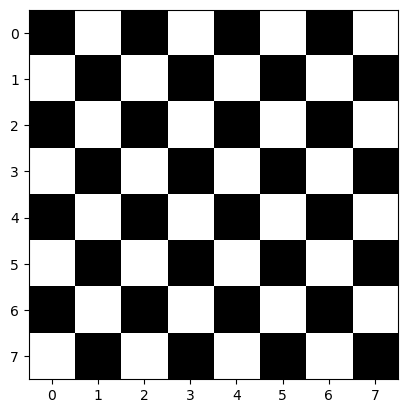

In [1]:
import numpy as np
check = np.zeros((8, 8))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest')

### 3.3.1.1. scikit-image y el ecosistema científico de Python

scikit-image está disponible tanto en instalaciones de Python basadas en pip y conda, como en la mayoría de las distribuciones de Linux. Otros paquetes de Python para el procesamiento y visualización de imágenes que operan en arreglos de NumPy incluyen:

**scipy.ndimage**

    Para arreglos N-dimensionales. Filtrado básico, morfología matemática, propiedades de regiones.
**Mahotas**

    Con un enfoque en implementaciones de alta velocidad.
**Napari**

    Un visor de imágenes multidimensional, rápido e interactivo, construido en Qt.

Algunas potentes bibliotecas de procesamiento de imágenes en C++ también tienen enlaces para Python:

**OpenCV**

    Una biblioteca de visión por computadora altamente optimizada con un enfoque en aplicaciones en tiempo real.
**ITK**

    El Insight ToolKit, especialmente útil para el registro y el trabajo con imágenes 3D.

En diversos grados, estos tienden a ser menos Pythonic y amigables con NumPy.


### 3.3.1.2. Qué incluye scikit-image

- **Sitio web:** https://scikit-image.org/
- **Galería de ejemplos:** https://scikit-image.org/docs/stable/auto_examples/

La biblioteca contiene predominantemente algoritmos de procesamiento de imágenes, pero también funciones utilitarias para facilitar el manejo y procesamiento de datos. Contiene los siguientes submódulos:

**color**

    Conversión de espacios de color.
**data**

    Imágenes de prueba y datos de ejemplo.
**draw**

    Primitivas de dibujo (líneas, texto, etc.) que operan sobre arreglos de NumPy.
**exposure**

    Ajuste de la intensidad de la imagen, por ejemplo, ecualización de histograma, etc.
**feature**

    Detección y extracción de características, por ejemplo, análisis de texturas, esquinas, etc.
**filters**

    Afilado, detección de bordes, filtros de rango, umbralización, etc.
**graph**

    Operaciones teóricas de grafos, por ejemplo, caminos más cortos.
**io**

    Lectura, guardado y visualización de imágenes y video.
**measure**

    Medición de propiedades de la imagen, por ejemplo, propiedades de regiones y contornos.
**metrics**

    Métricas correspondientes a imágenes, por ejemplo, métricas de distancia, similitud, etc.
**morphology**

    Operaciones morfológicas, por ejemplo, apertura o esqueletización.
**restoration**

    Algoritmos de restauración, por ejemplo, algoritmos de deconvolución, reducción de ruido, etc.
**segmentation**

    Partición de una imagen en múltiples regiones.
**transform**

    Transformaciones geométricas y otras, por ejemplo, rotación o la transformación de Radon.
**util**

    Utilidades genéricas.


### 3.3.2. Importación modulo

Importamos scikit-image usando la convención:

_instalar modulo con algo como:_ conda install scikit-image _o buscar como.._


In [2]:
import skimage as ski

La mayoría de las funcionalidades se encuentran en subpaquetes, por ejemplo:

In [3]:
image = ski.data.cat()

Puedes listar todos los submódulos con:

In [4]:
for m in dir(ski): print(m)

__version__
color
data
draw
exposure
feature
filters
future
graph
io
measure
metrics
morphology
registration
restoration
segmentation
transform
util


La mayoría de las funciones de scikit-image toman arreglos de NumPy (ndarrays) como argumentos.

In [5]:
camera = ski.data.camera()

numpy.ndarray

In [8]:
camera.dtype

dtype('uint8')

In [9]:
camera.shape

(512, 512)

In [13]:
filtered_camera = ski.filters.gaussian(camera, sigma=1)
type(filtered_camera)

numpy.ndarray

### 3.3.3. Datos de ejemplo

Para comenzar, necesitamos imágenes de ejemplo con las cuales trabajar. La biblioteca incluye algunas de estas:

`skimage.data`


In [14]:
image = ski.data.cat()
image.shape

(300, 451, 3)

### 3.3.4. Entrada/salida, tipos de datos y espacios de color

**E/S:** `skimage.io`

Guardar una imagen en el disco: `skimage.io.imsave()`


In [25]:
ski.io.imsave("cat.png", image)
# con ls el archivo cat.png se puede listar

Leer desde archivos: `skimage.io.imread()`

In [24]:
cat = ski.io.imread("cat.png")

In [28]:
cat

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]

viendo con Markdown en nb:

![cat](cat.png)

Esto funciona con muchos formatos de datos compatibles con la biblioteca ImageIO.

La carga también funciona con URLs:

In [29]:
logo = ski.io.imread('https://scikit-image.org/_static/img/logo.png')
logo

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### 3.3.4.1. Tipos de datos

Los arreglos de imagen (ndarrays) pueden estar representados ya sea por enteros (con signo o sin signo) o por flotantes.

Cuidado con los desbordamientos con tipos de datos enteros.


In [32]:
camera = ski.data.camera()
camera.dtype

dtype('uint8')

In [33]:
camera_multiply = 3 * camera
camera_multiply

array([[ 88,  88,  88, ...,  55,  58,  58],
       [ 88,  85,  85, ...,  58,  58,  58],
       [ 85,  85,  85, ...,  58,  58,  58],
       ...,
       [ 75,  75,  81, ..., 161, 110, 185],
       [ 75,  75,  78, ..., 218, 167, 248],
       [ 75,  75,  81, ..., 197, 200, 191]], dtype=uint8)

Md:
![Imagen de ejemplo](https://lectures.scientific-python.org/_images/sphx_glr_plot_camera_uint_001.png)

Diferentes tamaños de enteros son posibles: 8, 16 o 32 bytes, con signo o sin signo.

<span style="color:black; background-color:red; padding:2px;"> **Advertencia:**
Una convención importante (aunque discutible) de skimage: se supone que las imágenes en formato flotante deben estar en el rango de [-1, 1] (para tener un contraste comparable en todas las imágenes flotantes).
</span>

Algunas rutinas de procesamiento de imágenes necesitan trabajar con arreglos de flotantes, y por lo tanto, pueden generar un arreglo con un tipo y un rango de datos diferentes al arreglo de entrada.


In [35]:
camera_sobel = ski.filters.sobel(camera)
camera_sobel.max()

0.6447887988758096

Se proporcionan funciones utilitarias en skimage para convertir tanto el dtype como el rango de datos, siguiendo las convenciones de skimage: `util.img_as_float`, `util.img_as_ubyte`, etc.

Consulta la [guía del usuario](https://scikit-image.org/docs/stable/user_guide/data_types.html) para más detalles.


### 3.3.4.2. Espacios de color

Las imágenes a color tienen la forma (N, M, 3) o (N, M, 4) (cuando un canal alfa codifica la transparencia).


In [39]:
import scipy as sp
face = sp.datasets.face()
face.shape

(768, 1024, 3)

Las rutinas para convertir entre diferentes espacios de color (RGB, HSV, LAB, etc.) están disponibles en `skimage.color`: `color.rgb2hsv`, `color.lab2rgb`, etc. Consulta el docstring para conocer el dtype esperado (y el rango de datos) de las imágenes de entrada.


<span style="color:black; background-color:lightgray; padding:2px;">**Imágenes 3D:**
La mayoría de las funciones de skimage pueden tomar imágenes 3D como argumentos de entrada. Consulta el docstring para saber si una función puede usarse en imágenes 3D (por ejemplo, imágenes de MRI o CT).
</span>


<span style="color:black; background-color:lightgray; padding:2px;">**Ejercicio:**

    Abre una imagen a color en tu disco como un arreglo de NumPy.

    Encuentra una función de skimage que calcule el histograma de una imagen y grafica el histograma de cada canal de color.

    Convierte la imagen a escala de grises y grafica su histograma.
</span>


## 3.3.5. Preprocesamiento / mejora de imágenes

**Objetivos:** eliminación de ruido, extracción de características (bordes), …


### 3.3.5.1. Filtros locales

Los filtros locales reemplazan el valor de los píxeles por una función de los valores de los píxeles vecinos. La función puede ser lineal o no lineal.

**Vecindario:** cuadrado (elegir tamaño), disco, o un elemento estructurante más complicado.

Md:
![](https://lectures.scientific-python.org/_images/kernels.png)

**Ejemplo:** filtro Sobel horizontal

In [41]:
text = ski.data.text()
hsobel_text = ski.filters.sobel_h(text)

Utiliza el siguiente _kernel_ lineal para calcular los gradientes horizontales:

     1   2   1
     0   0   0
    -1  -2  -1

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_sobel_001.png)

### 3.3.5.2. Filtros no locales

Los filtros no locales usan una gran región de la imagen (o toda la imagen) para transformar el valor de un píxel:


In [43]:
camera = ski.data.camera()
camera_equalized = ski.exposure.equalize_hist(camera)

Mejora el contraste en grandes regiones casi uniformes.
![](https://lectures.scientific-python.org/_images/sphx_glr_plot_equalize_hist_001.png)

### 3.3.5.3. Morfología matemática

Consulta [Wikipedia](https://en.wikipedia.org/wiki/Mathematical_morphology) para una introducción a la morfología matemática.

Explora una imagen con una forma simple (un elemento estructurante) y modifica esta imagen de acuerdo a cómo la forma se ajusta o no a la imagen localmente.

**Elemento estructurante por defecto:** conectividad de 4 de un píxel.



In [45]:
# Importar elementos estructurantes para hacerlos más accesibles
from skimage.morphology import disk, diamond
diamond(1)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

![](https://lectures.scientific-python.org/_images/diamond_kernel.png)

**Erosión** = filtro mínimo. Reemplaza el valor de un píxel por el valor mínimo cubierto por el elemento estructurante:


In [47]:
a = np.zeros((7,7), dtype=np.uint8)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [48]:
ski.morphology.binary_erosion(a, diamond(1)).astype(np.uint8)


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [49]:
#Erosion removes objects smaller than the structure
ski.morphology.binary_erosion(a, diamond(2)).astype(np.uint8)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

**Dilatación:** filtro máximo:

In [50]:
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [51]:
ski.morphology.binary_dilation(a, diamond(1)).astype(np.uint8)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

**Apertura:** erosión + dilatación:


In [52]:
a = np.zeros((5,5), dtype=int)
a[1:4, 1:4] = 1; a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [53]:
ski.morphology.binary_opening(a, diamond(1)).astype(np.uint8)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

La apertura elimina pequeños objetos y suaviza esquinas.

<span style="color:black; background-color:lightgray; padding:2px;">**Morfología matemática en escala de grises:**
Las operaciones de morfología matemática también están disponibles para imágenes en escala de grises (no binarias) (tipo int o float). La erosión y la dilatación corresponden a filtros mínimos/max  respectivamente.
</span>

Morfología matemática de nivel superior disponible: tophat, skeletonization, etc.

<span style="color:black; background-color:yellow; padding:2px;">**Ver también:**
La morfología matemática básica también está implementada en `scipy.ndimage.morphology`. La implementación de `scipy.ndimage` funciona en arreglos de dimensiones arbitrarias.
</span>


**Ejemplo de comparación de filtros:** reducción de ruido en imágenes

In [54]:
coins = ski.data.coins()
coins_zoom = coins[10:80, 300:370]
median_coins = ski.filters.median(
    coins_zoom, disk(1)
)
tv_coins = ski.restoration.denoise_tv_chambolle(
    coins_zoom, weight=0.1
)
gaussian_coins = ski.filters.gaussian(coins, sigma=2)

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_filter_coins_001.png)

### 3.3.6. Segmentación de imágenes

La segmentación de imágenes es la atribución de diferentes etiquetas a diferentes regiones de la imagen, por ejemplo, para extraer los píxeles de un objeto de interés.


El método de [Otsu](https://en.wikipedia.org/wiki/Otsu%27s_method) es un método heurístico simple para encontrar un umbral que separe el primer plano del fondo. 

In [57]:
camera = ski.data.camera()
val = ski.filters.threshold_otsu(camera)
mask = camera < val

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_threshold_001.png)

_En versiones anteriores de scikit-image:_ `skimage.filters` se llama `skimage.filter`.


**Etiquetado de componentes conectados de una imagen discreta**

_Una vez que hayas separado los objetos del primer plano, es útil separarlos entre sí. Para esto, podemos asignar diferentes etiquetas enteras a cada uno._

Datos sintéticos:

In [59]:
n = 20
l = 256
im = np.zeros((l, l))
rng = np.random.default_rng()
points = l * rng.random((2, n ** 2))
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = ski.filters.gaussian(im, sigma=l / (4. * n))
blobs = im > im.mean()

Etiquetar todos los componentes conectados:

In [60]:
all_labels = ski.measure.label(blobs)

Etiquetar solo los componentes conectados del primer plano:

In [63]:
blobs_labels = ski.measure.label(blobs, background=0)

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_labels_001.png)
**Ver también:**[`scipy.ndimage.find_objects()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.find_objects.html#scipy.ndimage.find_objects) es útil para devolver cortes en objetos de una imagen.

### 3.3.6.2. Métodos basados en marcadores

Si tienes marcadores dentro de un conjunto de regiones, puedes usarlos para segmentar las regiones.

**Segmentación por Watershed**

El método Watershed ([`skimage.segmentation.watershed()`](https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.watershed)) es un enfoque de crecimiento de regiones que llena "cuencas" en la imagen.


In [64]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
import scipy as sp
distance = sp.ndimage.distance_transform_edt(image)
peak_idx = ski.feature.peak_local_max(
    distance, footprint=np.ones((3, 3)), labels=image
)
peak_mask = np.zeros_like(distance, dtype=bool)
peak_mask[tuple(peak_idx.T)] = True
markers = ski.morphology.label(peak_mask)
labels_ws = ski.segmentation.watershed(
    -distance, markers, mask=image
)

**Segmentación por caminante aleatorio**

El algoritmo de caminante aleatorio ([`skimage.segmentation.random_walker()`](https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.random_walker)) es similar al Watershed, pero con un enfoque más "probabilístico". Se basa en la idea de la difusión de etiquetas en la imagen:


In [65]:
# Transform markers image so that 0-valued pixels are to
# be labelled, and -1-valued pixels represent background
markers[~image] = -1
labels_rw = ski.segmentation.random_walker(image, markers)

![](https://lectures.scientific-python.org/_images/sphx_glr_plot_segmentations_001.png)
<span style="color:black; background-color:lightgray; padding:2px;">**Postprocesamiento de imágenes etiquetadas**
`skimage` proporciona varias funciones utilitarias que se pueden usar en imágenes etiquetadas (es decir, imágenes donde diferentes valores discretos identifican diferentes regiones). Los nombres de las funciones a menudo se explican por sí mismos: [`skimage.segmentation.clear_border()`](https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.clear_border), `skimage.segmentation.relabel_from_one()`, [`skimage.morphology.remove_small_objects()`](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_objects), etc.
</span>


<span style="color:black; background-color:lightgray; padding:2px;">**Ejercicio**

- Carga la imagen de monedas del submódulo de datos.

- Separa las monedas del fondo probando varios métodos de segmentación: umbralización de Otsu, umbralización adaptativa y segmentación por Watershed o caminante aleatorio.

- Si es necesario, utiliza una función de postprocesamiento para mejorar la segmentación de monedas / fondo.
</span>


### 3.3.7. Medición de propiedades de regiones

**Ejemplo:** calcula el tamaño y el perímetro de las dos regiones segmentadas:


In [67]:
properties = ski.measure.regionprops(labels_rw)
[float(prop.area) for prop in properties]

[770.0, 1168.0]

In [68]:
[prop.perimeter for prop in properties]

[100.91168824543142, 126.81118318204308]

<span style="color:black; background-color:yellow; padding:2px;">**Ver también:**_Para algunas propiedades, también hay funciones disponibles en `scipy.ndimage.measurements` con una API diferente (se devuelve una lista)._
</span>


<span style="color:black; background-color:lightgray; padding:2px;">**Ejercicio (continuación)**

- Usa la imagen binaria de las monedas y el fondo del ejercicio anterior.

- Calcula una imagen de etiquetas para las diferentes monedas.

- Calcula el tamaño y la excentricidad de todas las monedas.
</span>


### 3.3.8. Visualización e interacción de datos

Las visualizaciones significativas son útiles al probar una determinada cadena de procesamiento.

Algunas operaciones de procesamiento de imágenes:


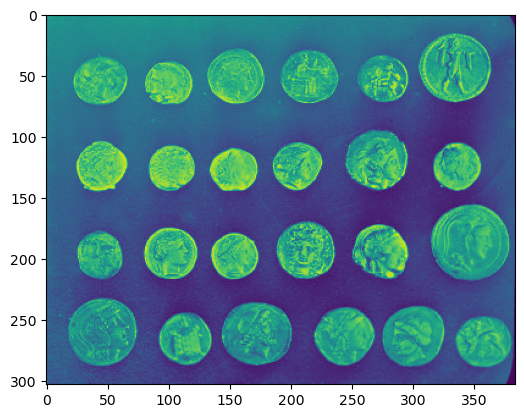

In [81]:
coins = ski.data.coins()
plt.figure()
plt.imshow(coins)

In [82]:
mask = coins > ski.filters.threshold_otsu(coins)
clean_border = ski.segmentation.clear_border(mask)

Visualizar resultado binario:

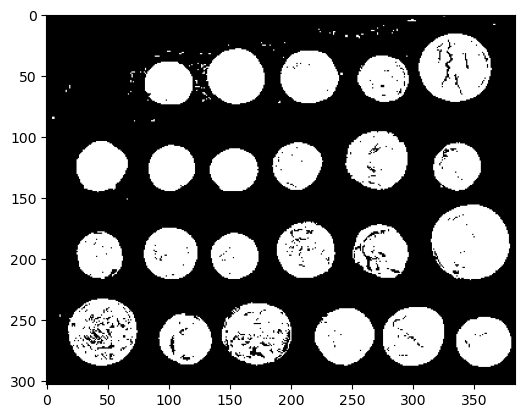

In [83]:
plt.figure()
plt.imshow(clean_border, cmap='gray')

Visualizar contorno

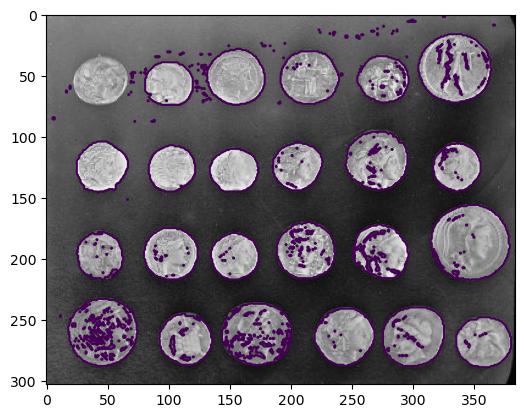

In [84]:
plt.figure()
plt.imshow(coins, cmap='gray')
plt.contour(clean_border, [0.5])

Usa la función utilitaria dedicada de skimage:

In [77]:
coins_edges = ski.segmentation.mark_boundaries(
    coins, clean_border.astype(int)
)

MD: ![](https://lectures.scientific-python.org/_images/sphx_glr_plot_boundaries_001.png)

### 3.3.9. Extracción de características para visión por computadora

Se pueden extraer descriptores geométricos o texturales de las imágenes para:

- Clasificar partes de la imagen (por ejemplo, cielo vs. edificios)
- Emparejar partes de diferentes imágenes (por ejemplo, para detección de objetos)
- Y muchas otras aplicaciones de visión por computadora

**Ejemplo:** detección de esquinas usando el detector de Harris


In [79]:
from skimage import data

tform = ski.transform.AffineTransform(
    scale=(1.3, 1.1), rotation=1, shear=0.7,
    translation=(210, 50)
)
image = ski.transform.warp(
    data.checkerboard(), tform.inverse, output_shape=(350, 350)
)

coords = ski.feature.corner_peaks(
    ski.feature.corner_harris(image), min_distance=5
)
coords_subpix = ski.feature.corner_subpix(
    image, coords, window_size=13
)

MD: ![](https://lectures.scientific-python.org/_images/sphx_glr_plot_features_001.png)

(Este ejemplo está tomado del ejemplo [`plot_corner`](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_corner.html) en scikit-image)

Puntos de interés como las esquinas pueden luego ser usados para emparejar objetos en diferentes imágenes, como se describe en el ejemplo [`plot_matching`](https://scikit-image.org/docs/stable/auto_examples/transform/plot_matching.html) de scikit-image.

[https://lectures.scientific-python.org/packages/scikit-image/index.html#full-code-examples](https://lectures.scientific-python.org/packages/scikit-image/index.html#full-code-examples)